In [33]:
BOOKS_PATH = r'..\data\raw\books.csv'
RATING_PATH = r'..\data\raw\ratings.csv'
USERS_PATH = r'..\data\raw\users.csv'

PROCESSED_BOOKS_OUTPUT = r'..\data\processed\cleaned_books.csv'
PROCESSED_Rating_OUTPUT = r'..\data\processed\cleaned_Rating.csv'
PROCESSED_Users_OUTPUT = r'..\data\processed\cleaned_users.csv'

# importing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
books_df = pd.read_csv(BOOKS_PATH, sep=';',
                       encoding='latin1', error_bad_lines=False)

rating_df = pd.read_csv(RATING_PATH, sep=';',
                        encoding='latin1', error_bad_lines=False)

users_df = pd.read_csv(USERS_PATH, sep=';',
                       encoding='latin1', error_bad_lines=False)

C:\Users\xobed\AppData\Local\Temp\ipykernel_23004\2428272424.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books_df = pd.read_csv(BOOKS_PATH, sep=';',
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, s

# Books


In [4]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### 1) missing values


In [5]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
books_df.dropna(inplace=True)

### 2)select Features


In [7]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books_df.drop(['Image-URL-S', 'Image-URL-M'], axis=1, inplace=True)

In [9]:
books_df = books_df.rename(columns={
    'ISBN': 'ISBN',
    'Book-Title': 'Title',
    'Book-Author': 'Author',
    'Year-Of-Publication': 'Publication_year',
    'Publisher': 'Publisher',
    'Image-URL-L': 'Book_image'
})

### 2) correct data types


In [10]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ISBN              271354 non-null  object
 1   Title             271354 non-null  object
 2   Author            271354 non-null  object
 3   Publication_year  271354 non-null  object
 4   Publisher         271354 non-null  object
 5   Book_image        271354 non-null  object
dtypes: object(6)
memory usage: 14.5+ MB


In [11]:
books_df['Publication_year'] = pd.to_numeric(books_df['Publication_year'])

In [12]:
books_df['Publication_year'].describe()

count    271354.000000
mean       1959.760379
std         257.995618
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Publication_year, dtype: float64

In [13]:
books_df[books_df['Publication_year'] > 2004]

,ISBN,Title,Author,Publication_year,Publisher,Book_image
3541,0140124373,Red Dwarf,Grant Naylor,2005,Penguin Books Ltd,http://images.amazon.com/images/P/0140124373.0...
12782,0380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks,http://images.amazon.com/images/P/0380816792.0...
26166,006272004X,The Astrologer's Handbook,Frances Sakoian,2005,HarperResource,http://images.amazon.com/images/P/006272004X.0...
30010,068160204X,The Royals,Kitty Kelley,2020,Bausch &amp; Lombard,http://images.amazon.com/images/P/068160204X.0...
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...
...,...,...,...,...,...,...
255409,068471809X,To Have and Have Not,Ernest Hemingway,2037,Simon &amp; Schuster,http://images.amazon.com/images/P/068471809X.0...
258207,0743484894,The Winter's Tale (Folger Shakespeare Library),William Shakespeare,2005,Washington Square Press,http://images.amazon.com/images/P/0743484894.0...
260974,0671740989,FOOTBALL SUPER TEAMS : FOOTBALL SUPER TEAMS,Bill Gutman,2030,Simon &amp; Schuster Children's Publishing,http://images.amazon.com/images/P/0671740989.0...
269371,1582344574,"Ninth Life of Louis Drax, The -POSTPONED",Liz Jensen,2005,Bloomsbury USA,http://images.amazon.com/images/P/1582344574.0...


This dataset was compiled in 2004, so all books after 2004 will be removed due to this data entry error


In [14]:
books_df = books_df[~(books_df['Publication_year'] > 2004)]

### 3)check for duplication


In [15]:
books_df.head()

,ISBN,Title,Author,Publication_year,Publisher,Book_image
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [16]:
len(books_df['ISBN'].unique())

271282

In [17]:
books_df[books_df.duplicated()]

,ISBN,Title,Author,Publication_year,Publisher,Book_image


### 4)Outliers


<Axes: xlabel='Publication_year', ylabel='Count'>

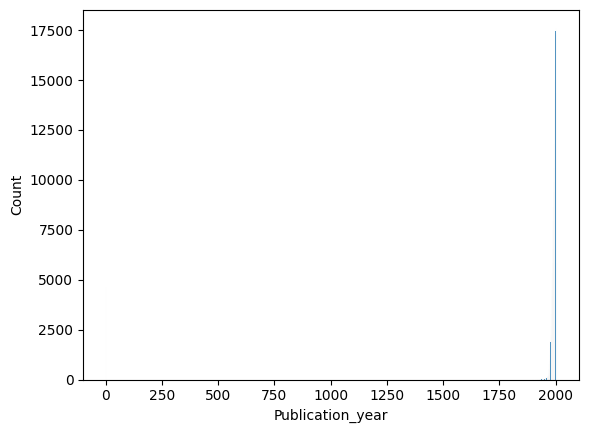

In [18]:
sns.histplot(books_df['Publication_year'])

In [19]:
books_df = books_df[~(books_df['Publication_year'] == 0)]

<Axes: xlabel='Publication_year', ylabel='Count'>

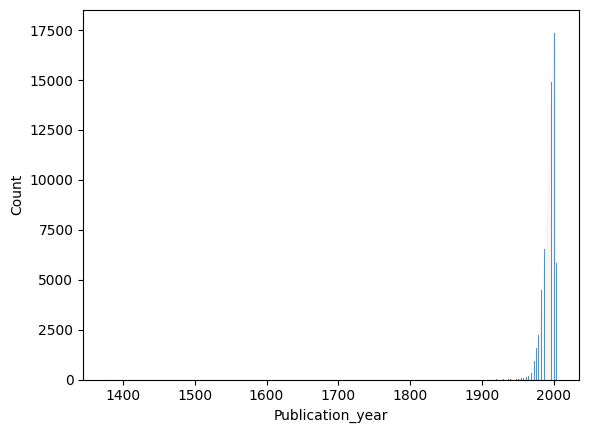

In [20]:
sns.histplot(books_df['Publication_year'])

In [25]:
books_df = books_df[~(books_df['Publication_year'] < 1900)]

<Axes: xlabel='Publication_year', ylabel='Count'>

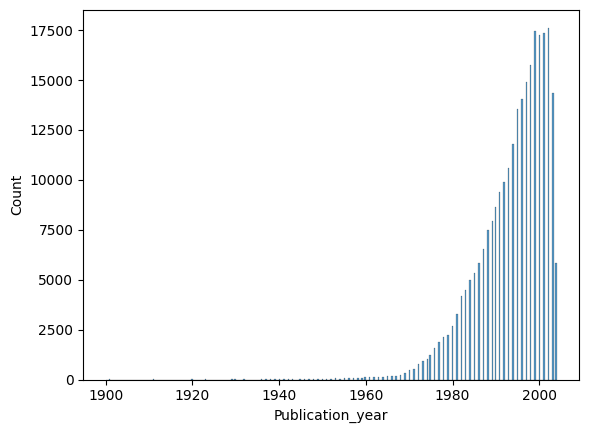

In [26]:
sns.histplot(books_df['Publication_year'])

In [31]:
books_df = books_df[~(books_df['Publication_year'] < 1960)]

<Axes: xlabel='Publication_year', ylabel='Count'>

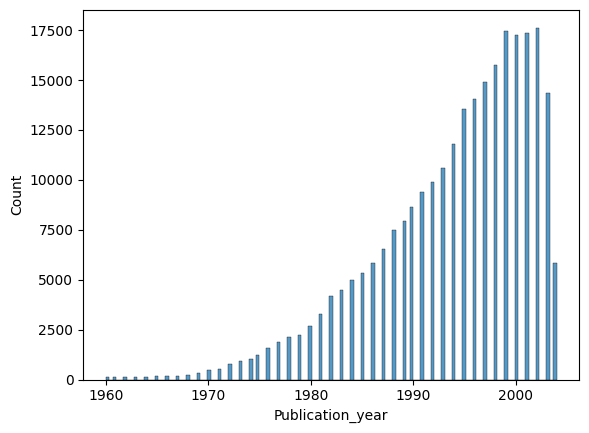

In [34]:
sns.histplot(books_df['Publication_year'])

---


In [35]:
books_df.to_csv(PROCESSED_BOOKS_OUTPUT, index=False)

---


# 2-USers


In [36]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


### 1) missing values


### 1) missing values


In [ ]:
users_df.isna().sum() / len(users_df) * 100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [ ]:
users_df.drop('Age', axis=1, inplace=True)

### 2)select Features


### 2) correct data types


In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


### 3)check for duplication


In [39]:
users_df.isna().sum() / len(users_df) * 100

User-ID      0.000000
Location     0.000000
Age         39.719857
dtype: float64

In [41]:
users_df.drop('Age', axis=1, inplace=True)

### 2)select Features


### 2) correct data types


In [42]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.3+ MB


### 3)check for duplication


In [46]:
users_df[users_df.duplicated()]

,User-ID,Location


---


In [45]:
users_df.to_csv(PROCESSED_Users_OUTPUT, index=False)

---


# Ratings


In [47]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### 1) missing values


In [48]:
rating_df.isna().sum() / len(rating_df) * 100

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

### 2)select Features


### 2) correct data types


In [49]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### 3)check for duplication


In [51]:
rating_df[rating_df.duplicated()]

,User-ID,ISBN,Book-Rating


### 4) Outliers


<Axes: xlabel='Book-Rating', ylabel='Count'>

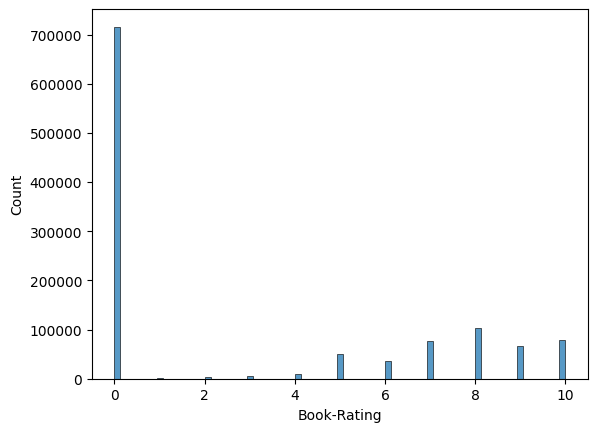

In [54]:
sns.histplot(rating_df['Book-Rating'])

In [57]:
rating_df['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [59]:
rating_df['User-ID'].value_counts().head(20)

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
230522     2991
16795      2948
234623     2674
36836      2529
52584      2512
245963     2507
204864     2504
55492      2459
185233     2448
171118     2421
Name: User-ID, dtype: int64

---


In [62]:
rating_df.to_csv(PROCESSED_Rating_OUTPUT, index=False)

---
